# **Fundamentos de Inteligencia Artificial**

### Juan Dario Rodas - jdrodas@hotmail.com
### Enero 12 de 2026


# **Fundamentos de Matplotlib**

## Introducción

**Matplotlib** es la librería de visualización más utilizada en Python y una herramienta fundamental para cualquier proyecto de Inteligencia Artificial. En este notebook aprenderemos los conceptos esenciales para crear visualizaciones efectivas de nuestros datos y resultados.

### ¿Por qué Matplotlib es importante en IA?

En los notebooks anteriores trabajamos con **Pandas** para manipular datos y **NumPy** para operaciones numéricas. Ahora necesitamos **visualizar**:

- **Datos de entrenamiento**: entender la distribución y características de nuestros datasets
- **Métricas de desempeño**: monitorear cómo aprende nuestro modelo (loss, accuracy, etc.)
- **Resultados**: visualizar predicciones, matrices de confusión, fronteras de decisión
- **Arquitecturas**: representar pesos, activaciones y características aprendidas



In [1]:
# Imports esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración para mejorar la visualización en Jupyter
%matplotlib inline

# Configuración de estilo y calidad de gráficos
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño por defecto de las figuras
plt.rcParams['figure.dpi'] = 100           # Resolución de las figuras
plt.rcParams['font.size'] = 11             # Tamaño de fuente por defecto

# Opcional: usar un estilo más moderno
plt.style.use('seaborn-v0_8-darkgrid')     # Estilo con grilla

print("Librerías importadas correctamente")
print(f"Versión de Matplotlib: {plt.matplotlib.__version__}")
print(f"Versión de NumPy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")

Librerías importadas correctamente
Versión de Matplotlib: 3.10.0
Versión de NumPy: 2.0.2
Versión de Pandas: 2.2.2


## **1. Anatomía de una Figura en Matplotlib**

Antes de crear gráficos complejos, es fundamental entender la estructura básica de Matplotlib.

### Componentes principales
```
┌─────────────────────────────────────┐
│         Figure (Figura)             │  ← Contenedor principal
│  ┌───────────────────────────────┐  │
│  │      Axes (Ejes)              │  │  ← Área de graficación
│  │                               │  │
│  │    ┌─────────────────┐        │  │
│  │    │   Plot Area     │        │  │  ← Donde se dibujan los datos
│  │    │                 │        │  │
│  │    └─────────────────┘        │  │
│  │    xlabel        ylabel       │  │  ← Etiquetas
│  │                               │  │
│  └───────────────────────────────┘  │
│              title                  │  ← Título
└─────────────────────────────────────┘
```

### Conceptos clave

- **Figure**: El lienzo completo donde se dibuja todo
- **Axes**: El sistema de coordenadas donde viven los datos (puede haber múltiples en una Figure)
- **Axis**: Los ejes X e Y individuales
- **Artist**: Cualquier elemento visual (líneas, texto, etc.)

### Dos formas de trabajar con Matplotlib

1. **pyplot (estilo MATLAB)**: Simple y rápido para gráficos básicos
2. **Orientado a objetos**: Más control y recomendado para gráficos complejos

En este notebook usaremos principalmente el **enfoque orientado a objetos** porque es más explícito y escalable para proyectos de IA.


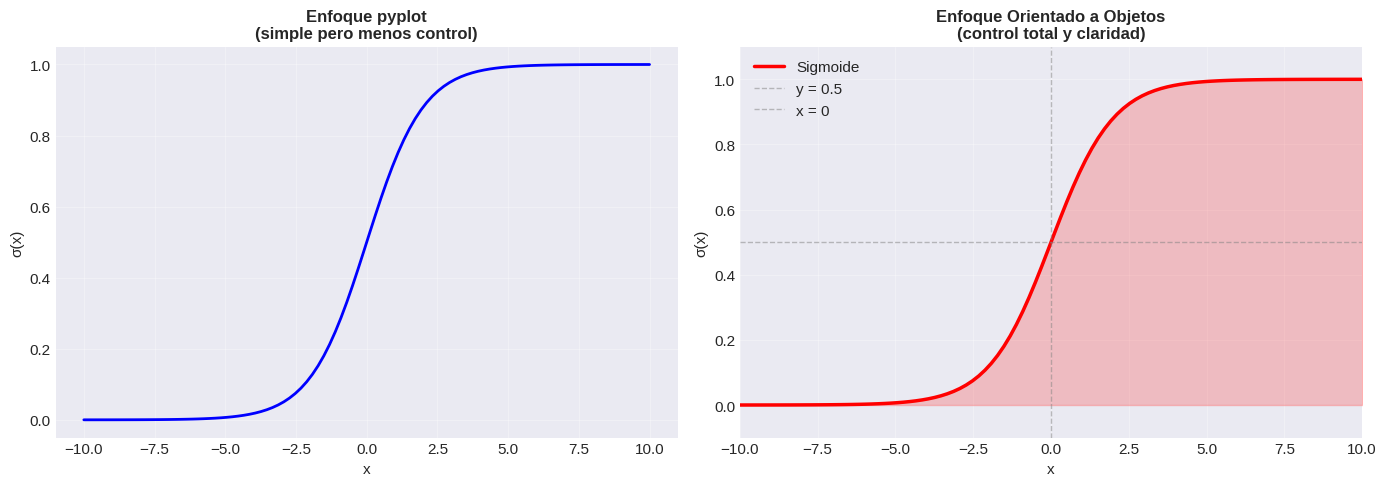


Ventajas del enfoque orientado a objetos:
  Control explícito sobre cada subplot (ax1, ax2)
  Fácil personalización individual de cada gráfico
  Código más legible y mantenible
  Ideal para figuras complejas con múltiples ejes


In [2]:
# Datos de ejemplo: una función sigmoide (función de activación común en IA)
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))  # Función sigmoide

# ==========================================
# Comparación lado a lado en una sola figura
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ENFOQUE 1: pyplot (estilo MATLAB) - simulado en ax1
ax1.plot(x, y, 'b-', linewidth=2)
ax1.set_title('Enfoque pyplot\n(simple pero menos control)', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('σ(x)')
ax1.grid(True, alpha=0.3)

# ENFOQUE 2: Orientado a Objetos (recomendado) - con personalización avanzada
ax2.plot(x, y, 'r-', linewidth=2.5, label='Sigmoide')
ax2.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='y = 0.5')
ax2.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='x = 0')
ax2.fill_between(x, 0, y, alpha=0.2, color='red')
ax2.set_title('Enfoque Orientado a Objetos\n(control total y claridad)', fontsize=12, fontweight='bold')
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('σ(x)', fontsize=11)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlim(-10, 10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVentajas del enfoque orientado a objetos:")
print("  Control explícito sobre cada subplot (ax1, ax2)")
print("  Fácil personalización individual de cada gráfico")
print("  Código más legible y mantenible")
print("  Ideal para figuras complejas con múltiples ejes")

## **2. Un primer Gráfico Simple**

Ahora que entendemos la estructura, creemos nuestro primer gráfico paso a paso usando el enfoque orientado a objetos.

Graficaremos una **función de pérdida típica** durante el entrenamiento de un modelo de IA.




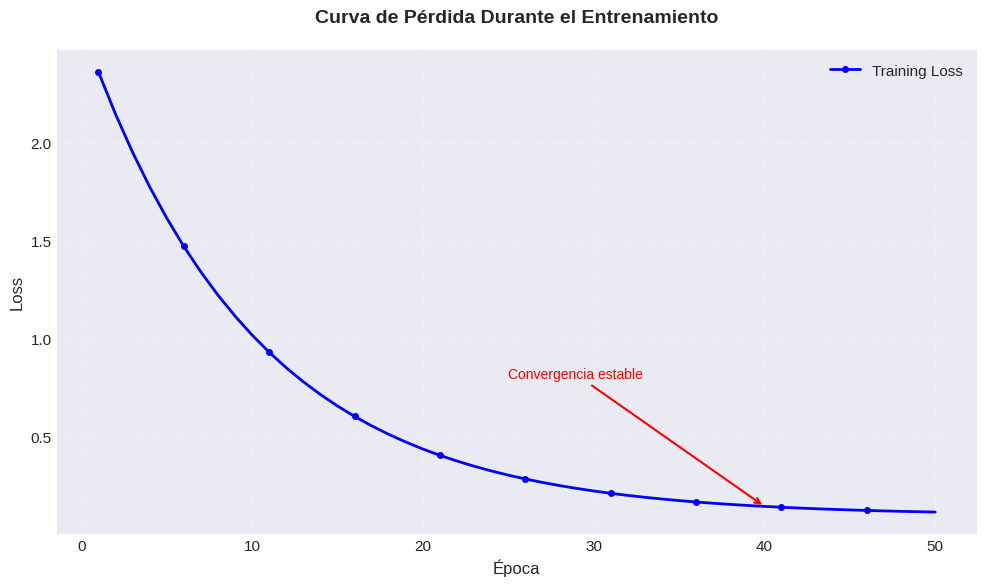

Gráfico básico creado exitosamente
  Pérdida inicial: 2.362
  Pérdida final: 0.117


In [4]:
# Simulamos el comportamiento de la pérdida (loss) durante el entrenamiento
epochs = np.arange(1, 51)  # 50 épocas
loss = 2.5 * np.exp(-0.1 * epochs) + 0.1  # Pérdida que decrece exponencialmente

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
ax.plot(epochs, loss, 'b-', linewidth=2, marker='o', markersize=4,
        markevery=5, label='Training Loss')

# Personalizar el gráfico
ax.set_title('Curva de Pérdida Durante el Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Época', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# Añadir una anotación para destacar un punto importante
ax.annotate('Convergencia estable',
            xy=(40, loss[39]),
            xytext=(25, 0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10,
            color='red')

plt.tight_layout()
plt.show()

print("Gráfico básico creado exitosamente")
print(f"  Pérdida inicial: {loss[0]:.3f}")
print(f"  Pérdida final: {loss[-1]:.3f}")



## **3. Gráficos Fundamentales para IA**

En esta sección exploraremos los tipos de gráficos más utilizados en proyectos de Inteligencia Artificial.

### 3.1 Gráficos de Líneas: Funciones de Activación

Las funciones de activación son componentes esenciales de las redes neuronales. Visualizarlas nos ayuda a entender cómo transforman las señales.



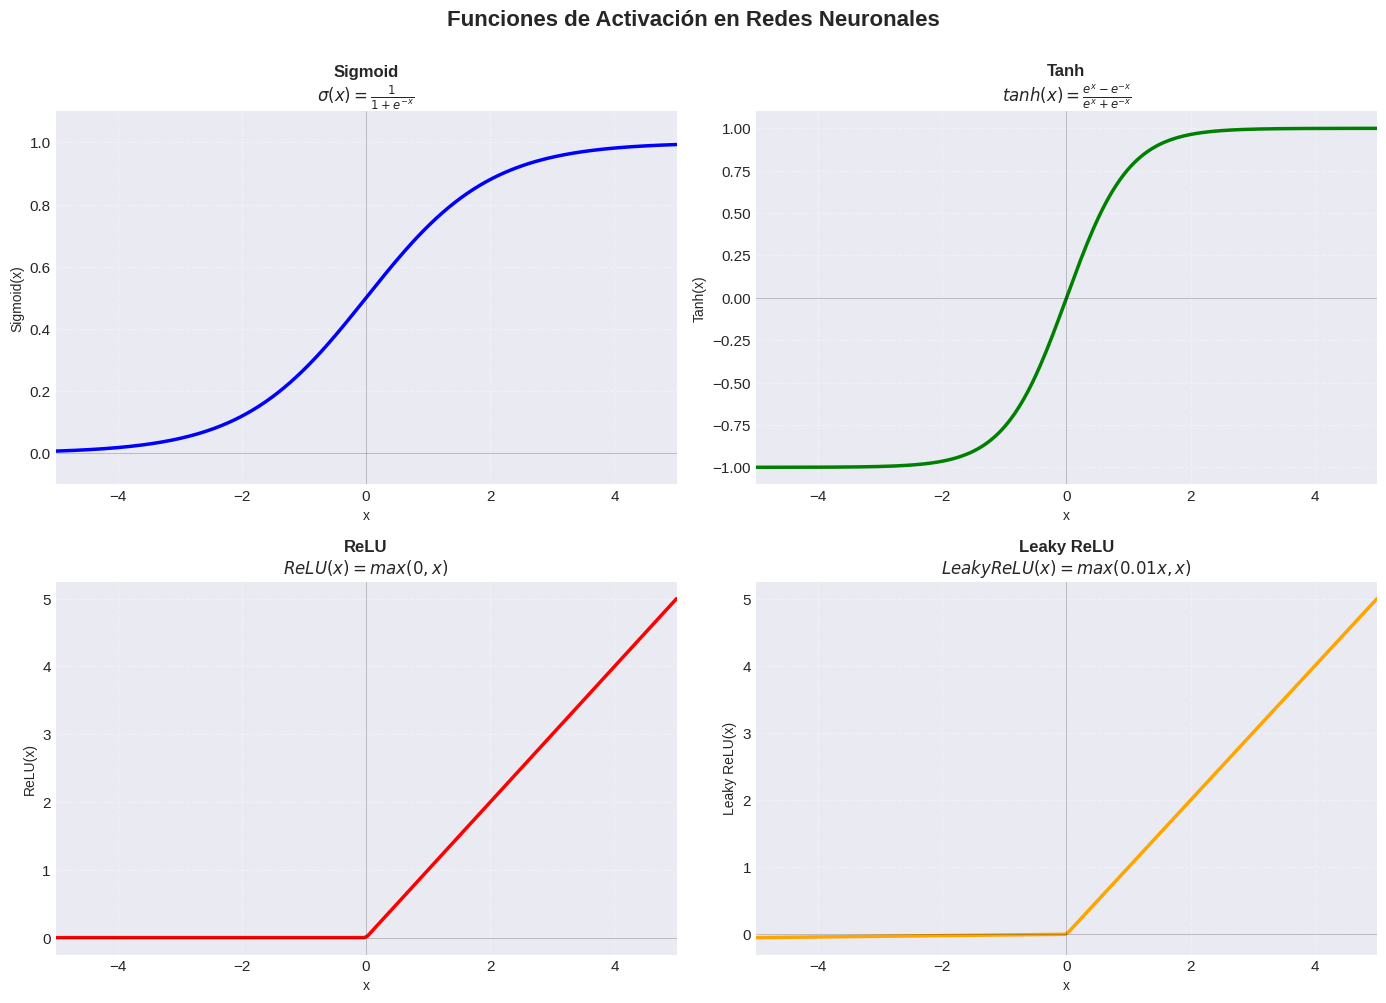

✓ Funciones de activación visualizadas
  • Sigmoid: rango (0, 1) - usado en capas de salida para clasificación binaria
  • Tanh: rango (-1, 1) - centra los datos alrededor de 0
  • ReLU: soluciona el problema del gradiente desvaneciente
  • Leaky ReLU: previene 'neuronas muertas' del ReLU


In [5]:
# Definir el rango de valores
x = np.linspace(-5, 5, 200)

# Funciones de activación comunes
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
leaky_relu = np.where(x > 0, x, 0.01 * x)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Configuración de cada función
activations = [
    (sigmoid, 'Sigmoid', 'blue', r'$\sigma(x) = \frac{1}{1+e^{-x}}$'),
    (tanh, 'Tanh', 'green', r'$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$'),
    (relu, 'ReLU', 'red', r'$ReLU(x) = max(0, x)$'),
    (leaky_relu, 'Leaky ReLU', 'orange', r'$LeakyReLU(x) = max(0.01x, x)$')
]

# Graficar cada función de activación
for idx, (func, name, color, formula) in enumerate(activations):
    ax = axes[idx]
    ax.plot(x, func, color=color, linewidth=2.5, label=name)
    ax.axhline(y=0, color='black', linewidth=0.5, linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='black', linewidth=0.5, linestyle='-', alpha=0.3)
    ax.set_title(f'{name}\n{formula}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel(f'{name}(x)', fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(-5, 5)

    # Ajustar límites en Y según la función
    if name in ['Sigmoid']:
        ax.set_ylim(-0.1, 1.1)
    elif name == 'Tanh':
        ax.set_ylim(-1.1, 1.1)

plt.suptitle('Funciones de Activación en Redes Neuronales',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Funciones de activación visualizadas")
print("  • Sigmoid: rango (0, 1) - usado en capas de salida para clasificación binaria")
print("  • Tanh: rango (-1, 1) - centra los datos alrededor de 0")
print("  • ReLU: soluciona el problema del gradiente desvaneciente")
print("  • Leaky ReLU: previene 'neuronas muertas' del ReLU")